<a href="https://colab.research.google.com/github/natkins14/FastF1-F1-Data-Analytics/blob/main/Speed_Traces_with_Corner_Annotations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Plotting Speed Traces with Corner Annotations

In [ ]:
pip install fastf1

In [ ]:
import matplotlib.pyplot as plt

import fastf1
from fastf1 import plotting

fastf1.plotting.setup_mpl(mpl_timedelta_support=True, misc_mpl_mods=False, color_scheme='fastf1')


2021 Spanish Grand Prix Qualifying - Hamilton

req         WARNING 	DEFAULT CACHE ENABLED! (24.0 KB) /root/.cache/fastf1
core           INFO 	Loading data for Spanish Grand Prix - Qualifying [v3.4.4]
INFO:fastf1.fastf1.core:Loading data for Spanish Grand Prix - Qualifying [v3.4.4]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for session_status_

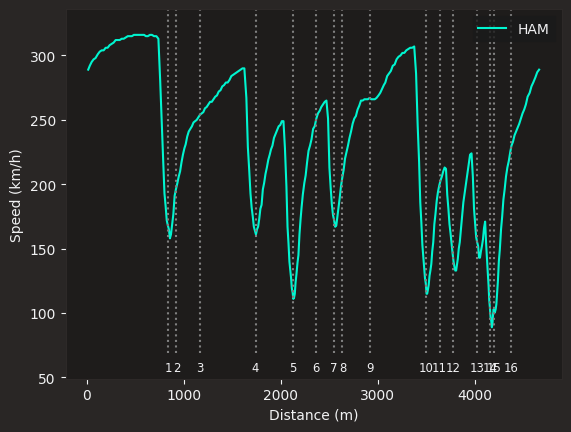

In [ ]:
session = fastf1.get_session(2021, 'Spanish Grand Prix', 'Q')
session.load()

#get fastest lap and the car telemetry data for the lap

fastest_lap = session.laps.pick_fastest()
car_data = fastest_lap.get_car_data().add_distance()

# load the circuit info that includes the information about corner locations

circuit_info = session.get_circuit_info()

# Create a plot and plot the speed trace as well as the corner markers

team_color = fastf1.plotting.get_team_color(fastest_lap['Team'],session=session)

fig, ax = plt.subplots()
ax.plot(car_data['Distance'], car_data['Speed'], color=team_color, label=fastest_lap['Driver'])

# draw vertical dotted lines at each corner that range from slightly below the minimum speed
# to slightly above the maximum speed

v_min = car_data['Speed'].min()
v_max = car_data['Speed'].max()
ax.vlines(x=circuit_info.corners['Distance'], ymin=v_min-20, ymax=v_max+20, linestyles='dotted', colors='grey')

# plot corner number ust below each vertical line

for _, corner in circuit_info.corners.iterrows():
  txt = f"{corner['Number']}{corner['Letter']}"
  ax.text(corner['Distance'], v_min-30, txt, va='center_baseline', ha='center', size='small')

ax.set_xlabel('Distance (m)')
ax.set_ylabel('Speed (km/h)')
ax.legend()

# manually adjust the y-axis limits to include the corner numbers

ax.set_ylim([v_min - 40, v_max + 20])

plt.show()

Analysis:
- Low Speed Corners: 5,10,13,14,15
- Medium Speed Corners: 1, 2, 4, 7, 8, 11, 12
- High Speed Corners: 3, 6, 9, 16

2024 Saudi Arabian Grand Prix Qualifying

core           INFO 	Loading data for Saudi Arabian Grand Prix - Qualifying [v3.4.4]
INFO:fastf1.fastf1.core:Loading data for Saudi Arabian Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
DEBUG:fastf1.ergast:Failed to parse timestamp '' in Ergastresponse.
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core           INFO 	Processi

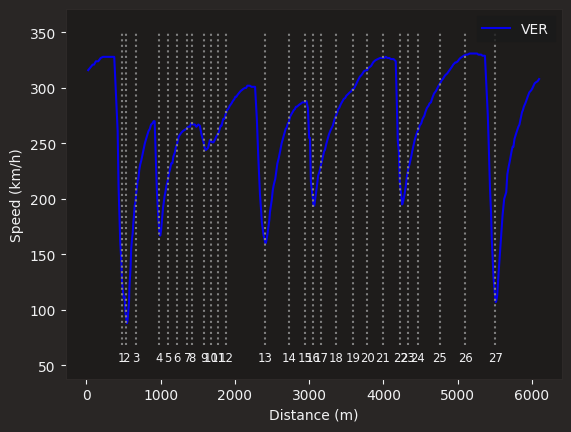

In [ ]:
session = fastf1.get_session(2024, 'Saudi Arabian Grand Prix', 'Q')
session.load()

#get fastest lap and the car telemetry data for the lap

fastest_lap = session.laps.pick_fastest()
car_data = fastest_lap.get_car_data().add_distance()

# load the circuit info that includes the information about corner locations

circuit_info = session.get_circuit_info()

# Create a plot and plot the speed trace as well as the corner markers

team_color = fastf1.plotting.get_team_color(fastest_lap['Team'],session=session)

fig, ax = plt.subplots()
ax.plot(car_data['Distance'], car_data['Speed'], color=team_color, label=fastest_lap['Driver'])

# draw vertical dotted lines at each corner that range from slightly below the minimum speed
# to slightly above the maximum speed

v_min = car_data['Speed'].min()
v_max = car_data['Speed'].max()
ax.vlines(x=circuit_info.corners['Distance'], ymin=v_min-20, ymax=v_max+20, linestyles='dotted', colors='grey')

# plot corner number ust below each vertical line

for _, corner in circuit_info.corners.iterrows():
  txt = f"{corner['Number']}{corner['Letter']}"
  ax.text(corner['Distance'], v_min-30, txt, va='center_baseline', ha='center', size='small')

ax.set_xlabel('Distance (m)')
ax.set_ylabel('Speed (km/h)')
ax.legend()

# manually adjust the y-axis limits to include the corner numbers

ax.set_ylim([v_min - 50, v_max + 40])

plt.show()